<a href="https://colab.research.google.com/github/AnnegretH/test-repository/blob/master/ANN_HEART_CSV_%20_FEATURE%20COLUMNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import tensorflow as tf
from tensorflow import keras
from tensorboard.plugins.hparams import api as hp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorboard.plugins.hparams import api as hp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
data = pd.read_csv('heart.csv')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Age vs Maximum Heart Rate Scatter Plot')

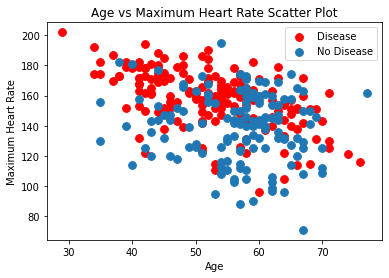

In [0]:
#disease and thalach (“Max Heart Rate”) vs age:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red", s=60)
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");
plt.title('Age vs Maximum Heart Rate Scatter Plot')
#Looks like maximum heart rate can be a predictor

In [0]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   2

In [0]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
import matplotlib as plt 
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


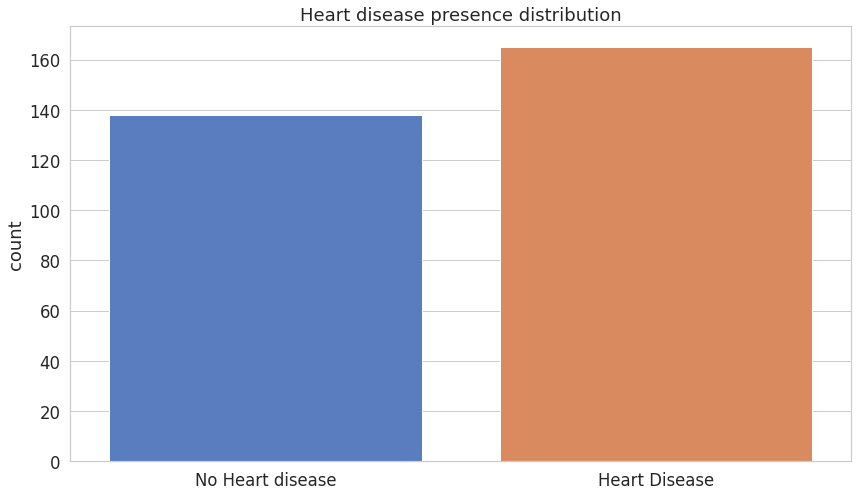

In [0]:
import seaborn as sns
f = sns.countplot(x='target', data=data)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

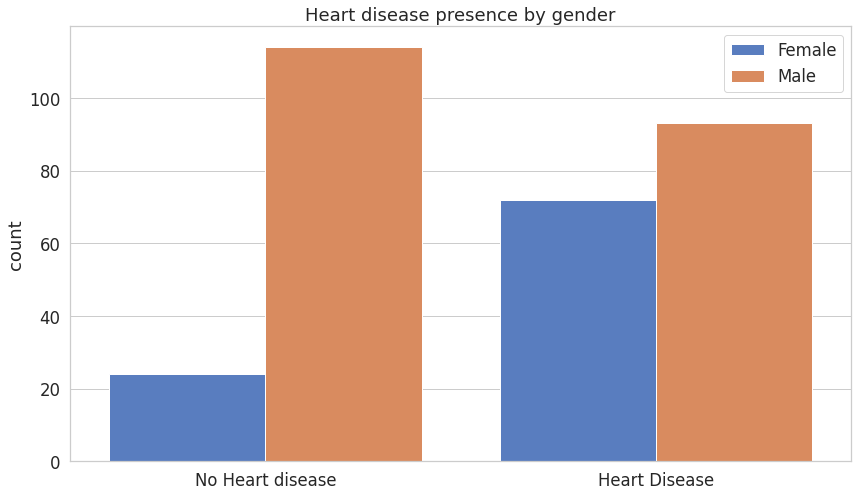

In [0]:
f = sns.countplot(x='target', data=data, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

Text(0.5, 1.0, 'Age Distribution of Non Heart Diseased Patients')

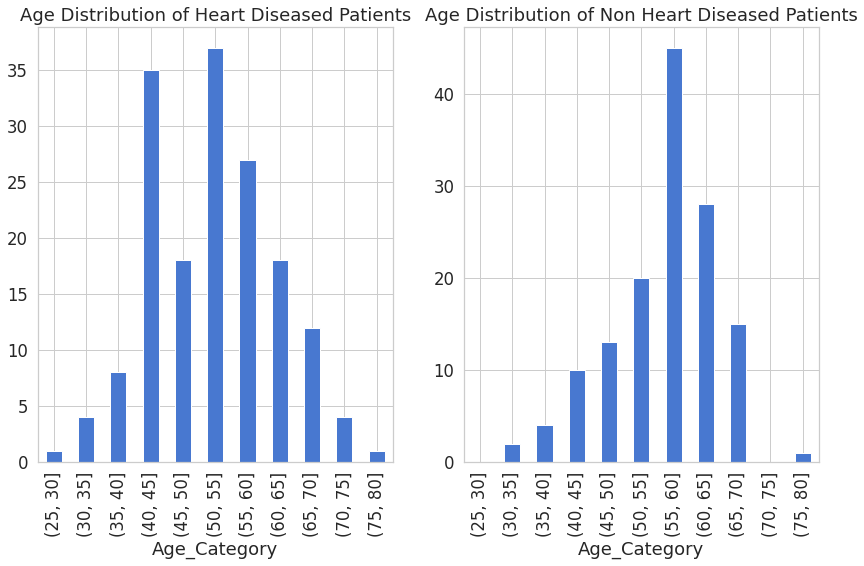

In [0]:
data['Age_Category'] = pd.cut(data['age'],bins=list(np.arange(25, 85, 5)))
plt.subplot(121)
data[data['target']==1].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Heart Diseased Patients')
plt.subplot(122)
data[data['target']==0].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Non Heart Diseased Patients')

In [0]:
del data['Age_Category']


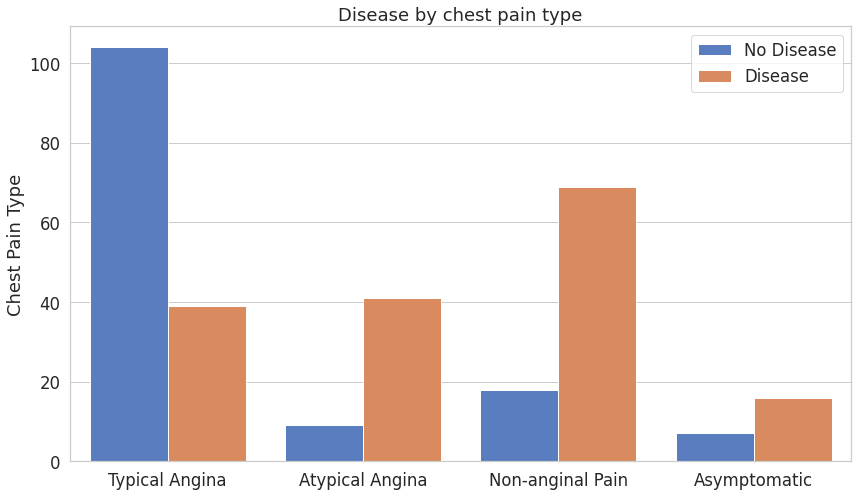

In [0]:
f = sns.countplot(x='cp', data=data, hue='target')
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
f.set_title('Disease by chest pain type')
plt.ylabel('Chest Pain Type')
plt.xlabel('')
plt.legend(['No Disease', 'Disease']);

In [0]:
X = data.loc[:,data.columns!='target']
y = data.iloc[:,-1]
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
feature_columns = []

# numeric columns
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  feature_columns.append(tf.feature_column.numeric_column(header))

# bucketized columns
age = tf.feature_column.numeric_column("age")
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# indicator columns
data["thal"] = data["thal"].apply(str)
thal = tf.feature_column.categorical_column_with_vocabulary_list(
      'thal', ['3', '6', '7'])
thal_one_hot = tf.feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

data["sex"] = data["sex"].apply(str)
sex = tf.feature_column.categorical_column_with_vocabulary_list(
      'sex', ['0', '1'])
sex_one_hot = tf.feature_column.indicator_column(sex)
feature_columns.append(sex_one_hot)

data["cp"] = data["cp"].apply(str)
cp = tf.feature_column.categorical_column_with_vocabulary_list(
      'cp', ['0', '1', '2', '3'])
cp_one_hot = tf.feature_column.indicator_column(cp)
feature_columns.append(cp_one_hot)

data["slope"] = data["slope"].apply(str)
slope = tf.feature_column.categorical_column_with_vocabulary_list(
      'slope', ['0', '1', '2'])
slope_one_hot = tf.feature_column.indicator_column(slope)
feature_columns.append(slope_one_hot)


# embedding columns
thal_embedding = tf.feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# crossed columns _ feature crossing
age_thal_crossed = tf.feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
age_thal_crossed = tf.feature_column.indicator_column(age_thal_crossed)
feature_columns.append(age_thal_crossed)

cp_slope_crossed = tf.feature_column.crossed_column([cp, slope], hash_bucket_size=1000)
cp_slope_crossed = tf.feature_column.indicator_column(cp_slope_crossed)
feature_columns.append(cp_slope_crossed)

In [0]:
def create_dataset(dataframe, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe)) \
          .batch(batch_size)

In [0]:
train, test = train_test_split(data, test_size=0.3, random_state=RANDOM_SEED)

In [0]:
train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=100, use_multiprocessing=True)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - 0s 63ms/step - loss: 2.0635 - accuracy: 0.4528 - val_loss: 0.6251 - val_accuracy: 0.6374
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 1.1730 - accuracy: 0.6179 - val_loss: 0.7245 - val_accuracy: 0.5824
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.9981 - accuracy: 0.5519 - val_loss: 0.5577 - val_accuracy: 0.7033
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 1.0203 - accuracy: 

In [0]:
model.evaluate(test_ds)

3/3 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8571


[0.38340091705322266, 0.8571428656578064]

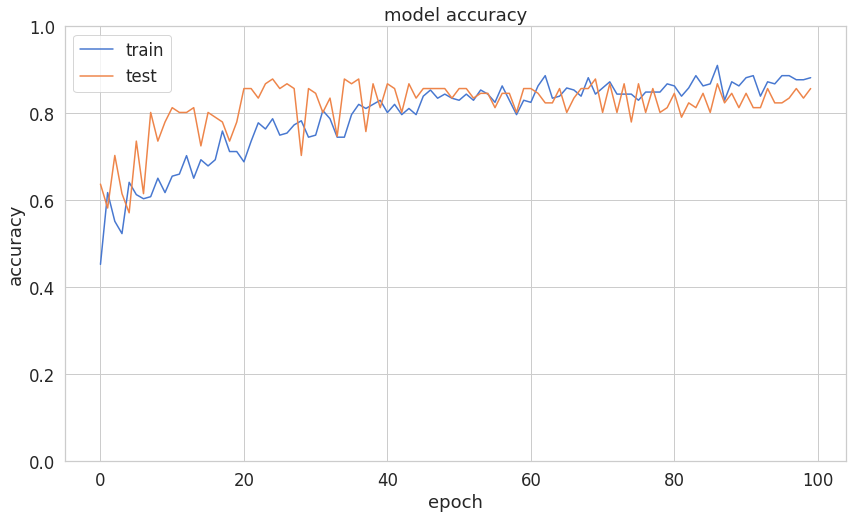

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

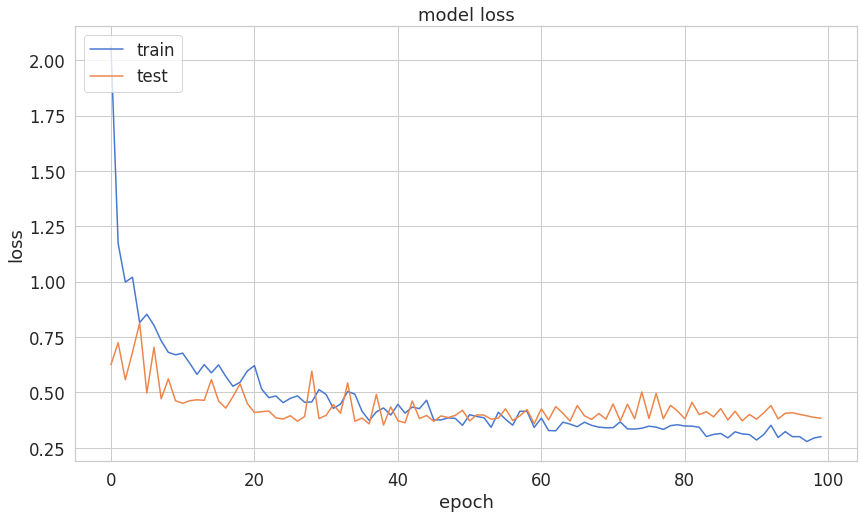

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
predictions = model.predict(test_ds)

In [0]:
bin_predictions = tf.round(predictions).numpy().flatten()

In [0]:
print(classification_report(y_test.values, bin_predictions))

Text(0.5, 1.0, 'Variable Heat Map')

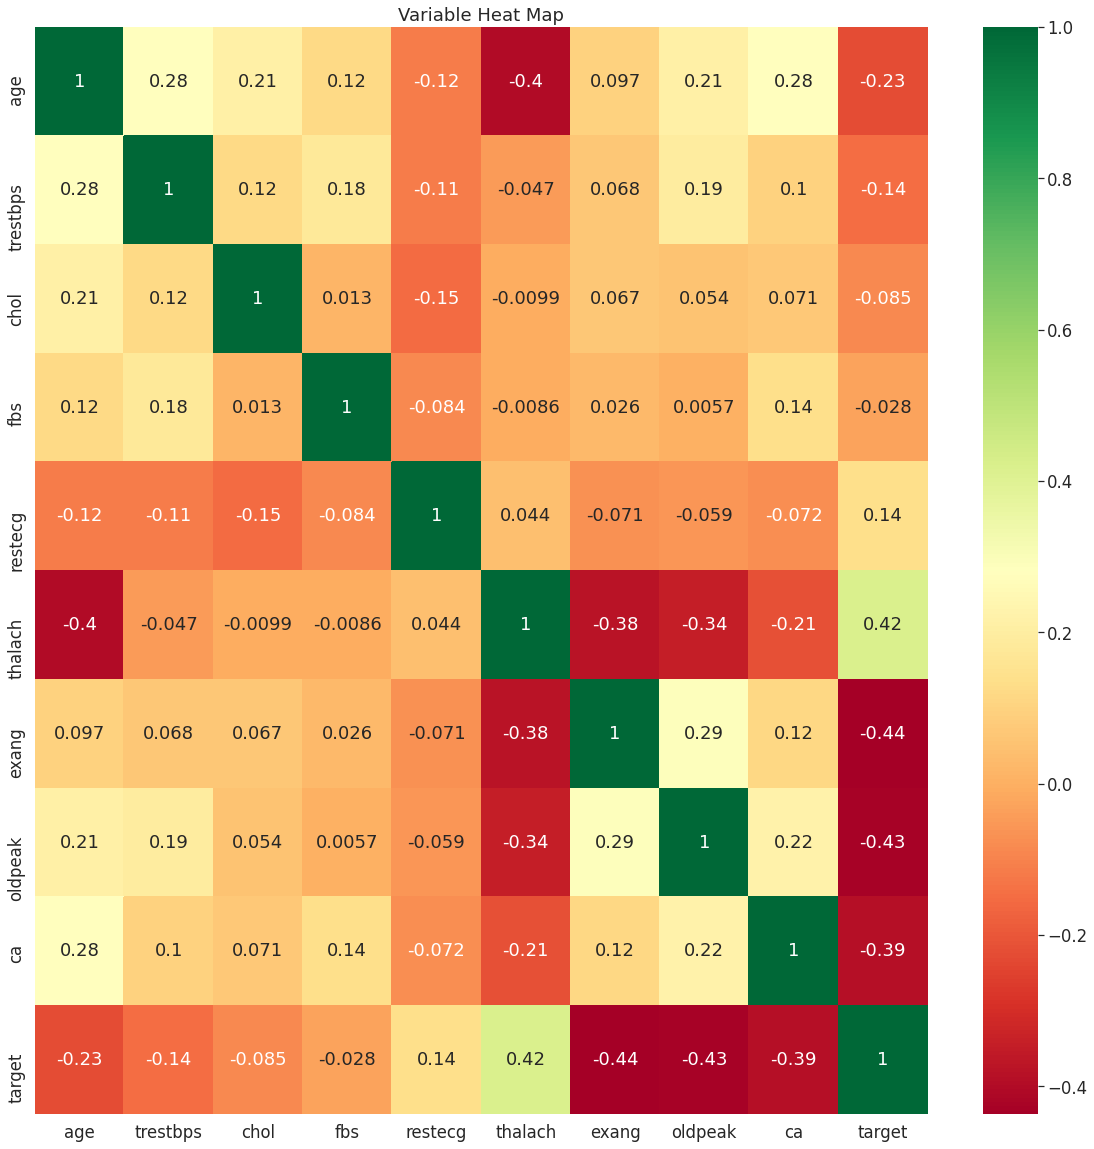

In [0]:
#HeatMap ! :) feature selection the positive correlations like chest pain, shows that there is a significant correlation
#between [chestpain, thalach, slope] and heart disease.  I did the heat mat for all the data, not the tain data. 
import seaborn as sns
#get correlations
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title('Variable Heat Map')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c5bf8358>,
      dtype=object)

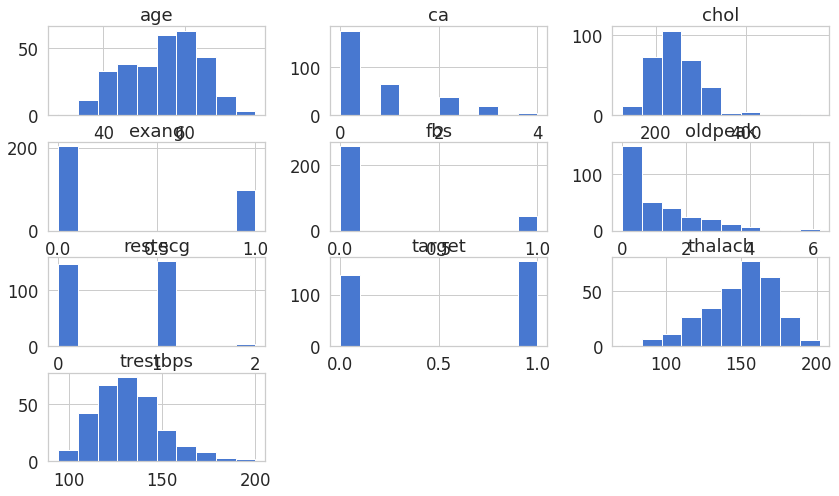

In [0]:
data.hist()
#this shows us histograms of the data. again this is for all teh data not the training data

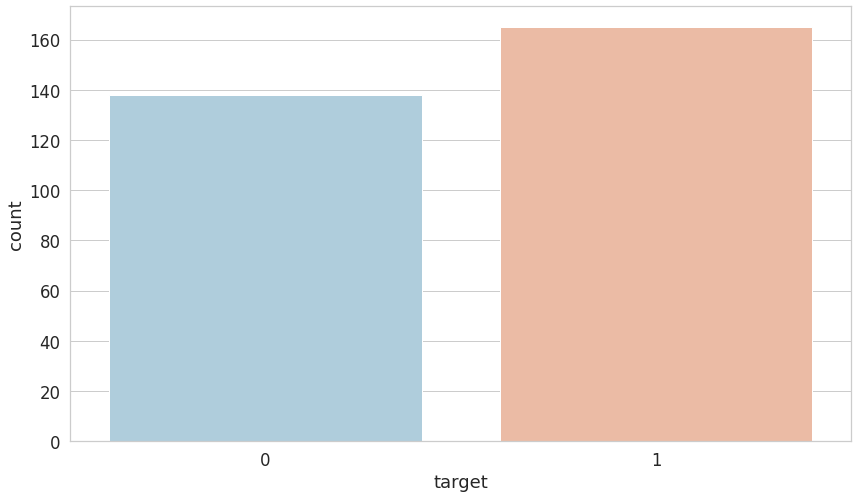

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')
#this tells us whether our dataset is balanced or not... it is quite balanced